# A Comprehensive Tutorial on Optical Character Recognition (OCR) in Python With Pytesseract

## Why learn Optical Character Recognition (OCR)?

## Top Open-source OCR Libraries in Python

Since OCR is a popular ongoing problem, there are many open-source libraries that try to solve it. In this section, we will cover the ones that gained the most popularity due to their high performance and accuracy. 

### Tesseract

Tesseract OCR is an open-source optical character recognition engine that is the most popular among developers. Like other tools in this list, Tesseract can take images of text and convert them into editable text. Here are its main advantages and disadvantages:

- Advantages:
    - Widely used and mature library with a large community.
    - Supports over 100 languages.
    - Free and open-source.
- Disadvantages:
    - Accuracy can be lower compared to some deep learning-based solutions.
    - Limited configuration options.

### Easy OCR

EasyOCR is a Python library designed for effortless Optical Character Recognition (OCR). It lives up to its name by offering a user-friendly approach to text extraction from images. Here's a breakdown of EasyOCR's advantages and disadvantages:

- Advantages:
    - User-friendly and easy to set up.
    - High accuracy with deep learning models.
    - Supports various languages out-of-the-box.
- Disadvantages:
    - Reliant on pre-trained models which can be large in size.
    - Might be slower than Tesseract for simpler tasks.

### Keras OCR

Keras-OCR is a Python library built on top of Keras, a popular deep learning framework. It provides out-of-the-box OCR models and an end-to-end training pipeline to build new OCR models. Here are its pros and cons:

- Advantages:
    - Deep learning-based approach offering high accuracy for various text types.
    - Customizable model selection and training.
    - Can be more accurate on complex layouts or handwritten text.
- Disadvantages:
    - Requires GPU for optimal performance.
    - Steeper learning curve due to its deep learning nature.
    - Training custom models can be time-consuming.
 
----------------------

Here is table summarizing their differences, advantages and disadvantages:

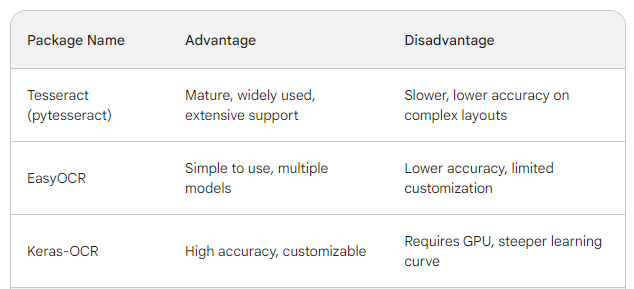

In this tutorial, we will focus on PyTesseract, which is Tesseract's Python API. We will learn how to extract text from simple images, how to draw bounding box around text and perform a case study with a scanned document. 

Let's start!

## A Step-by-step Guide to OCR with PyTesseract & OpenCV

### Installation

PyTesseract works on top of the official Tesseract engine which is a separate CLI software. Before installing `pytesseract`, you must have the engine installed. The below are installation instructions for different platforms.

For Ubuntu or WSL2 (my choice):

```
$ sudo apt update && sudo apt upgrade
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```

For Mac using Homebrew:

```
$ brew install tesseract
```

For Windows, follow the instructions from [this GitHub page](https://github.com/UB-Mannheim/tesseract/wiki).

Next, create a new virtual environment. I will be using Conda:

```bash
$ conda create -n ocr python==3.9 -y
$ conda activate ocr
```

Then, you must install `pytesseract` for doing OCR and `opencv` for image manipulation:

```bash
$ pip install pytesseract 
$ pip install opencv-python
```

If you are following this tutorial in Jupyter, run these commands in the same terminal session so that your new virtual environment is added as a kernel:

```bash
$ pip install ipykernel
$ ipython kernel install --user --name=ocr
```

Now, we can start writing code.

### Basic usage

We start by importing the necessary libraries:

In [1]:
import cv2
import pytesseract

Our task is to read the text from the following image:

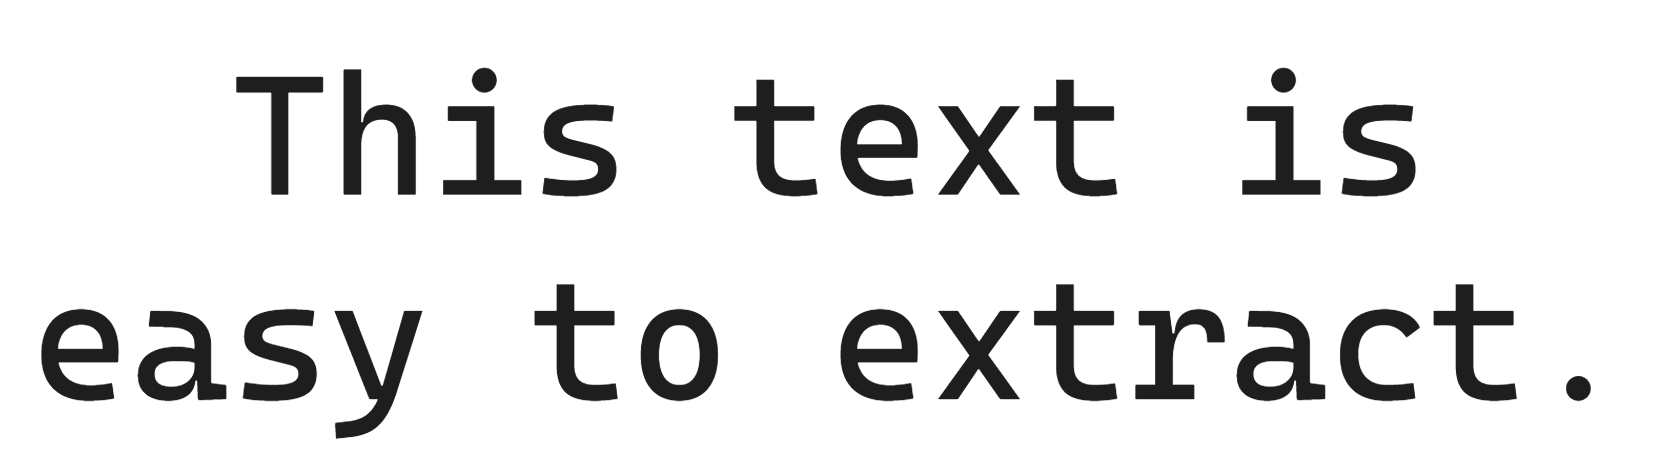

First, we define the image path and feed it to `cv2.imread` function:

In [22]:
# Read image
easy_text_path = "images/easy_text.png"
easy_img = cv2.imread(easy_text_path)

Then, we pass the loaded image to `image_to_string` function of `pytesseract` to extract the text:

In [23]:
# Convert to text
text = pytesseract.image_to_string(easy_img)
print(text)

This text is
easy to extract.



It is as easy as that! Let's convert what we just did into a function:

In [24]:
def image_to_text(input_path):
    """
    A function to read text from images.
    """
    img = cv2.imread(input_path)
    text = pytesseract.image_to_string(img)

    return text.strip()

Let's use the function on a more difficult image:

![](images/medium_text.png)

The image offers more of a challenge as there are more punctuation symbols and text in different fonts. 

In [25]:
# Define image path
medium_text_path = "images/medium_text.png"

# Extract text
extracted_text = image_to_text(medium_text_path)
print(extracted_text)

Home > Tutorials » Data Engineering

Snowflake Tutorial For Beginners:
From Architecture to Running
Databases

Learn the fundamentals of cloud data warehouse management using
Snowflake. Snowflake is a cloud-based platform that offers significant
benefits for companies wanting to extract as much insight from their data as
quickly and efficiently as possible.

Jan 2024 - 12 min read


Our function worked nearly perfectly. It confused one of the dots and ">" signs but otherwise, the result is very acceptable.

### Drawing bounding boxes around text

A common operation in OCR is drawing bounding boxes around text. This operation is supported in PyTesseract. 

First, we pass a loaded image to `image_to_data` function:

In [4]:
from pytesseract import Output

# Extract recognized data from easy text
data = pytesseract.image_to_data(easy_img, output_type=Output.DICT)

The `Output.DICT` part ensures that the image details are returned as a dictionary. Let's take a look inside:

In [5]:
data

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2, 3],
 'left': [0, 41, 41, 236, 236, 734, 1242, 41, 41, 534, 841],
 'top': [0, 68, 68, 68, 68, 80, 68, 284, 309, 284, 284],
 'width': [1658, 1550, 1550, 1179, 380, 383, 173, 1550, 381, 184, 750],
 'height': [469, 371, 371, 128, 128, 116, 128, 155, 130, 117, 117],
 'conf': [-1, -1, -1, -1, 96, 95, 95, -1, 96, 96, 96],
 'text': ['', '', '', '', 'This', 'text', 'is', '', 'easy', 'to', 'extract.']}

The dictionary contains a lot of information about the image. First, notice the `conf` and `text` keys. They both have the length 11:

In [26]:
len(data["text"])

11

This means that `pytesseract` drew 11 boxes. The `conf` stands for confidence. If it is equal to `-1`, then the corresponding box is drawn around blocks of text, rather than individual words. For example, if you look at the first four `width` and `height` values, they are large compared to the rest because those boxes are drawn around the entire text in the middle, then for each line of text and the overall image itself. Also:

- `left` is the distance from the upper-left corner of the bounding box, to the left border of the image.
- `top` is the distance from the upper-left corner of the bounding box, to the top border of the image.
- `width` and `height` are the width and height of the bounding box.

Using these pieces of information, let's draw the boxes on top of the image in OpenCV.

First, we extract the data again and its length:

In [27]:
from pytesseract import Output

# Extract recognized data
data = pytesseract.image_to_data(easy_img, output_type=Output.DICT)
n_boxes = len(data["text"])

Then, we create a loop for the number of found boxes:

In [ ]:
for i in range(n_boxes):
    if data["conf"][i] == -1:
        continue

Inside the loop, we create a condition that skips the current loop iteration if `conf` equals to -1. Skipping larger bounding boxes will keep our image clean.

Then, we define the coordinates of the current box, specifically the locations of the upper left and bottom right corners:

In [ ]:
for i in range(n_boxes):
    if data["conf"][i] == -1:
        continue
    # Coordinates
    x, y = data["left"][i], data["top"][i]
    w, h = data["width"][i], data["height"][i]

    # Corners
    top_left = (x, y)
    bottom_right = (x + w, y + h)

After defining some box parameters such as box color and thickness in pixels, we pass all the information to `cv2.rectangle` function:

In [28]:
for i in range(n_boxes):
    if data["conf"][i] == -1:
        continue
    # Coordinates
    x, y = data["left"][i], data["top"][i]
    w, h = data["width"][i], data["height"][i]

    # Corners
    top_left = (x, y)
    bottom_right = (x + w, y + h)

    # Box params
    green = (0, 255, 0)
    thickness = 3  # pixels

    cv2.rectangle(
        img=easy_img, pt1=top_left, pt2=bottom_right, color=green, thickness=thickness
    )

The function will draw the boxes on top of the original images. Let's save the image and take a look:

In [7]:
# Save the image
output_image_path = "images/text_with_boxes.jpg"
cv2.imwrite(output_image_path, easy_img)

True

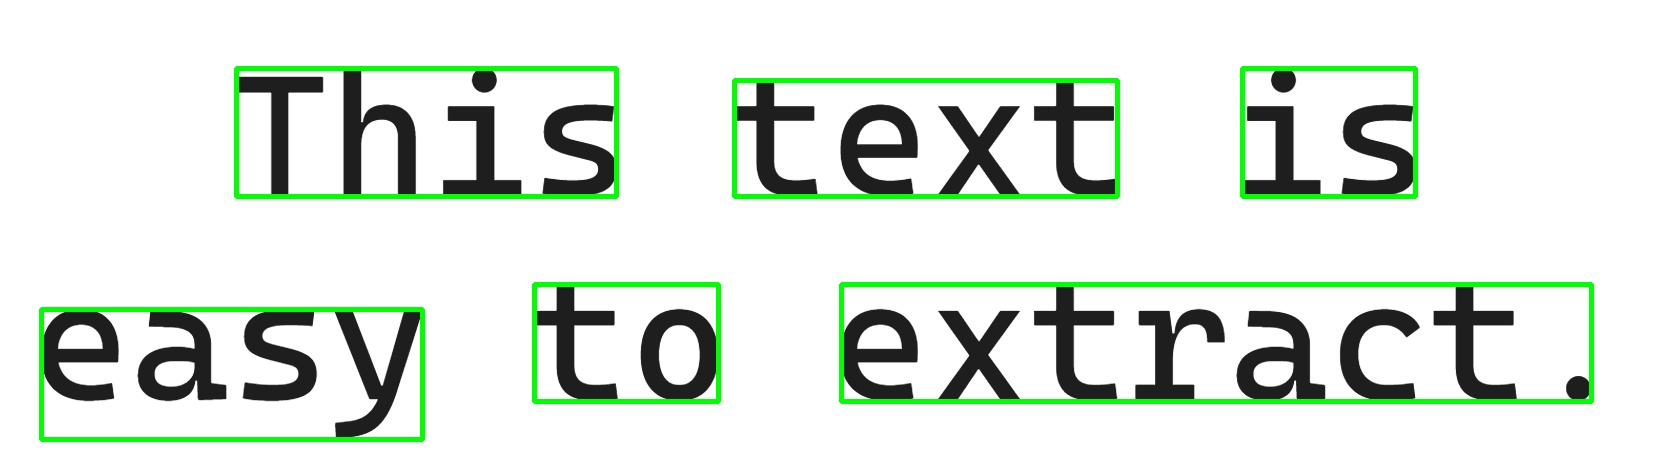

The result is just what we wanted!

Now, let's put everything we did into a function again:

In [12]:
def draw_bounding_boxes(input_img_path, output_path):
    img = cv2.imread(input_img_path)

    # Extract data
    data = pytesseract.image_to_data(img, output_type=Output.DICT)
    n_boxes = len(data["text"])

    for i in range(n_boxes):
        if data["conf"][i] == -1:
            continue
        # Coordinates
        x, y = data["left"][i], data["top"][i]
        w, h = data["width"][i], data["height"][i]

        # Corners
        top_left = (x, y)
        bottom_right = (x + w, y + h)

        # Box params
        green = (0, 255, 0)
        thickness = 1  # The function-version uses thinner lines

        cv2.rectangle(img, top_left, bottom_right, green, thickness)

    # Save the image with boxes
    cv2.imwrite(output_path, img)

And use the function on the medium-hard text:

In [13]:
output_path = "images/medium_text_with_boxes.png"

draw_bounding_boxes(medium_text_path, output_path)

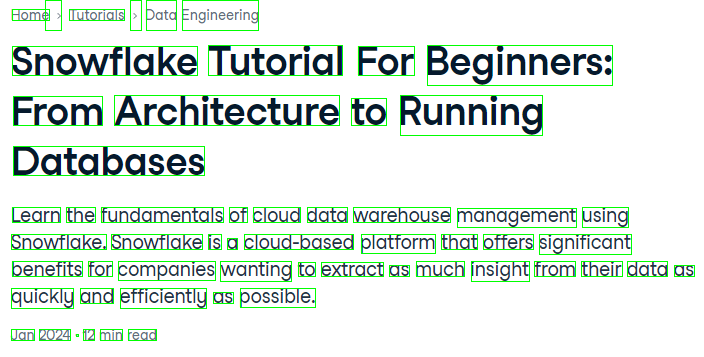

Even for the harder image, the result is perfect!

## Case study: OCR on a PDF file with Python

Let's do a case-study on a sample scanned PDF file. In practice, it is highly likely that you will be working with scanned PDFs instead of images, like this one:

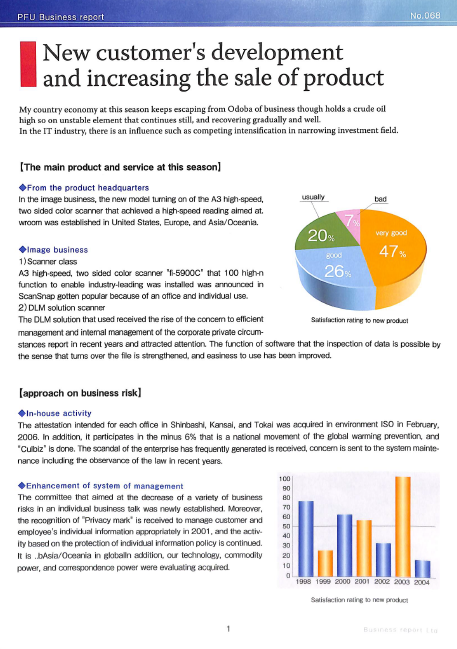

You can download the PDF from [this page of my GitHub](https://github.com/BexTuychiev/medium_stories/blob/master/2024/4_april/6_ocr/scanned_document.pdf).

The next step is installing the `pdf2image` library, which requires PDF processing software called Poppler. Here are platform-specific instructions:

For Mac:

```bash
$ brew install poppler
$ pip install pdf2image
```

For Linux and WSL2:

```bash
$ sudo apt-get install -y poppler-utils
$ pip install pdf2image
```

For Windows, you can follow the the instructions [from the PDF2Image docs.](https://pdf2image.readthedocs.io/en/latest/installation.html#windows)

After installation, we import the relevant modules:

In [29]:
import pathlib
from pathlib import Path

from pdf2image import convert_from_path

The `convert_from_path` function converts a given PDF to a series of images. Here is a function that saves each page of a PDF file as an image to a given directory:

In [30]:
def pdf_to_image(pdf_path, output_folder: str = "."):
    """
    A function to convert PDF files to images
    """
    # Create the output folder if it doesn't exist
    if not Path(output_folder).exists():
        Path(output_folder).mkdir()

    pages = convert_from_path(pdf_path, output_folder=output_folder, fmt="png")

    return pages

Let's run it on our document:

In [20]:
pdf_path = "scanned_document.pdf"

pdf_to_image(pdf_path, output_folder="documents")

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1662x2341>]

The output is a list containing a single image `PngImageFile` object. Let's take a look at the `documents` directory:

In [31]:
ls documents

0a652696-0c08-4e78-a99c-98137db535eb-1.png
2d8f6922-99c4-4ef4-a475-ef81effe65a3-1.png
31c80c84-f5dd-4723-b0f5-71fcc38dc459-1.png


The image is there, so let's feed it to our `image_to_text` function we created in the beginning and print the first few hundred characters of the extracted text:

In [21]:
scanned_img_path = "documents/2d8f6922-99c4-4ef4-a475-ef81effe65a3-1.png"

print(image_to_text(scanned_img_path)[:377])

PEU Business report

 

New customer's development
and increasing the sale of product

My country economy at this season keeps escaping from Odoba of business though holds a crude oil
high so on unstable element that continues still, and recovering gradually and well.
In the IT industry, there is an influence such as competing intensification in narrowing investment field.




If we compare the text to the file, everything is working well - the formatting and spacing is preserved and the text is accurate. So, how do share the extracted text?

Well, the best format to share extract PDF text is a PDF! PyTesseract has a `image_to_pdf_or_hocr` function that takes any image with text and converts it to a raw, text searchable PDF file. Let's use it on our scanned image:

In [37]:
raw_pdf = pytesseract.image_to_pdf_or_hocr(scanned_img_path)

with open("searchable_pdf.pdf", "w+b") as f:
    f.write(bytearray(raw_pdf))

And here is what the `searchable_pdf` looks like:

![](images/searchable.gif)

As you can see, I can highlight and copy text from the file. Besides, all elements of the original PDF is preserved.

## Image preprocessing techniques for OCR in OpenCV

There is no one-size-fits-all approach for OCR. The techniques we've covered today may not work with other types of images. It is recommended to experiment with different image preprocessing techniques and Tesseract configurations to find the optimal settings for specific images. 

The most important factor in OCR is image quality. A properly scanned, fully vertical and high contrast (black and white) images tend to work best with any OCR software. Remember, just because you can read the text, it doesn't mean your computer can.

If your images don't satisfy the high quality standards of Tesseract and the output is gibberish, then there are some preprocessing steps you can perform.  

1. Grayscale conversion

First, start with converting colored images to grayscale. This can improve accuracy by removing color variations that might confuse the recognition process. In OpenCV, this will look like this:

In [32]:
def grayscale(image):
    """Converts an image to grayscale.

    Args:
        image: The input image in BGR format.

    Returns:
        The grayscale image.
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

2. Noise reduction

Not all images, especially scanned documents, come with pristine, uniform backgrounds. Also, some images might be from old documents where the pages deteriorated due to age. Here is an example:

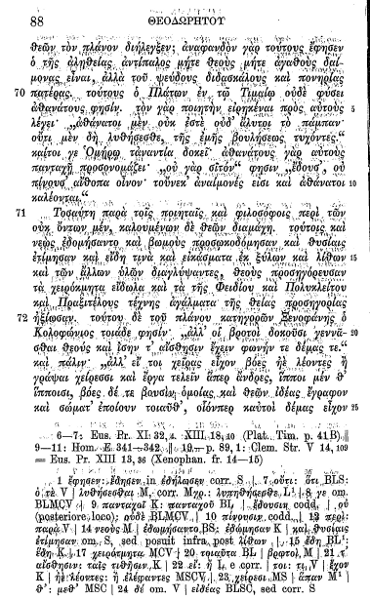

Apply techniques like denoising filters (e.g., median blur) to reduce noise artifacts in the image that can lead to misinterpretations during OCR. In OpenCV, you can use `medianBlur` function:

In [33]:
def denoise(image):
    """Reduces noise in the image using a median blur filter.

    Args:
        image: The input grayscale image.

    Returns:
        The denoised image.
    """
    return cv2.medianBlur(image, 5)  # Adjust kernel size as needed

3. Sharpening

In some cases, sharpening the image can enhance edges and improve character recognition, especially for blurry or low-resolution images. Sharpening can be performed by applying a Laplacian filter in OpenCV:

In [34]:
def sharpen(image):
    """Sharpens the image using a Laplacian filter.

    Args:
        image: The input grayscale image.

    Returns:
        The sharpened image (be cautious with sharpening).
    """
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

4. Binarization

For certain images, binarization (converting the image to black and white) might be beneficial. Experiment with different thresholding techniques to find the optimal separation between foreground (text) and background. However, binarization can be sensitive to variations in lighting and might not always be necessary. Here is an example of what binarized image looks like:

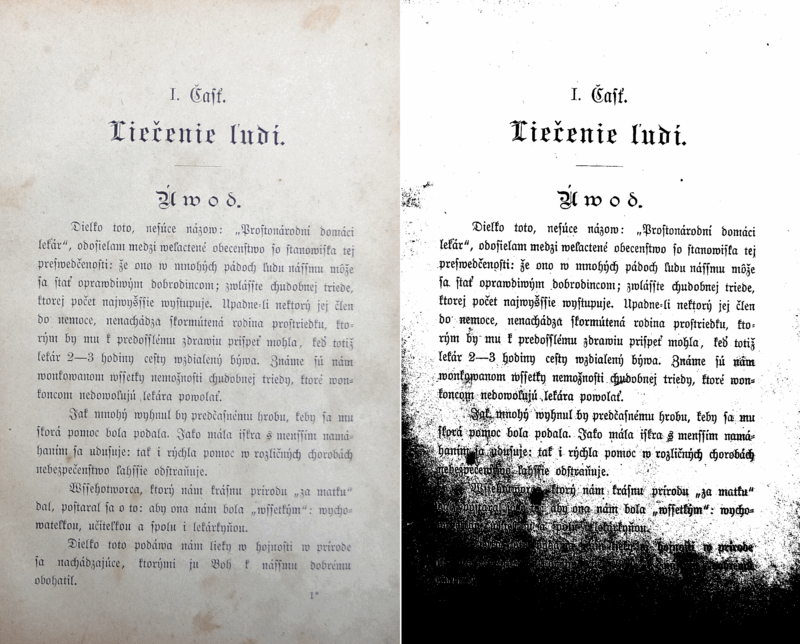

To perform binarization in OpenCV, you can use the `adaptiveThreshold` function:

In [35]:
def binarize(image):
    """Binarizes the image using adaptive thresholding.

    Args:
        image: The input grayscale image.

    Returns:
        The binary image.
    """
    thresh = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
    )

    return thresh

5. Other techniques

There are many other preprocessing techniques such as:
- Dilation: making small and thin fonts bolder to improve recognition
- Erosion: eroding bold text to improve accuracy. Common in historic documents with thick fonts.
- Canny edge detection
- Skew correction: correcting the tilt (skewness) of text lines. Common in incorrectly scanned documents

You can learn more about image quality improvements from [this page of Tesseract](https://tesseract-ocr.github.io/tessdoc/ImproveQuality) documentation and also, from [this helpful article](https://nanonets.com/blog/ocr-with-tesseract/).

## Conclusion

In this article, you've taken the first steps to learn about the dynamic problem that is OCR. We've first covered how to extract text from simple images, then moved on to more difficult images with complex formatting.

We've also learned an end-to-end workflow to extract text from scanned PDFs and how to save extracted text as a PDF again so that it becomes searchable. We've capped off the article with some tips to improve image quality with OpenCV before feeding it to Tesseract.

If you want to learn more about solving image-related problems, here are some computer vision resources for you to check out:
- [Image manipulation in Skimage course](https://www.datacamp.com/courses/image-processing-in-python)
- [CNNs in Python tutorial](https://www.datacamp.com/tutorial/convolutional-neural-networks-python)
- [Image processing skill track - a collection of courses](https://www.datacamp.com/tracks/image-processing)
- [OpenCV tutorial in Python](https://www.datacamp.com/tutorial/opencv-tutorial)

Thank you for reading!